## ciao sono marco

## ciao sono marco 2

In [2]:
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting


In [3]:
gp = fastf1.get_event(2023, 'Abu Dhabi')
sessions = gp.get_session
print(sessions)
qualifying = gp.get_session('Q')
qualifying.load()
print(qualifying.results)

req         WARNING 	DEFAULT CACHE ENABLED! (45.76 MB) /Users/marcochiapperini/Library/Caches/fastf1
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


<bound method Event.get_session of RoundNumber                                                         22
Country                                                      Abu Dhabi
Location                                                    Yas Island
OfficialEventName    FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate                                          2023-11-26 00:00:00
EventName                                         Abu Dhabi Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2023-11-24 13:30:00+04:00
Session1DateUtc                                    2023-11-24 09:30:00
Session2                                                    Practice 2
Session2Date                                 2023-11-24 17:00:00+04:00
Session2DateUtc                                    2023-11-24 13:00:00
Session3                                  

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '4', '22', '14', '27', '11', '10', '44', '31', '18', '23', '3', '55', '20', '77', '24', '2']


   DriverNumber BroadcastName Abbreviation         DriverId         TeamName  \
1             1  M VERSTAPPEN          VER   max_verstappen  Red Bull Racing   
16           16     C LECLERC          LEC          leclerc          Ferrari   
81           81     O PIASTRI          PIA          piastri          McLaren   
63           63     G RUSSELL          RUS          russell         Mercedes   
4             4      L NORRIS          NOR           norris          McLaren   
22           22     Y TSUNODA          TSU          tsunoda       AlphaTauri   
14           14      F ALONSO          ALO           alonso     Aston Martin   
27           27  N HULKENBERG          HUL       hulkenberg     Haas F1 Team   
11           11       S PEREZ          PER            perez  Red Bull Racing   
10           10       P GASLY          GAS            gasly           Alpine   
44           44    L HAMILTON          HAM         hamilton         Mercedes   
31           31        E OCON          O

In [4]:
#Ottenere i dati dei tempi sul giro dei piloti durante una sessione
laps = qualifying.laps
print(laps.head())  # Visualizza i primi 5 giri

#Filtrare i giri di un determinato pilota
driver_laps = laps[laps['Driver'] == 'HAM']  # 'HAM' per Lewis Hamilton
print(driver_laps)

                    Time Driver DriverNumber                LapTime  \
0 0 days 00:20:42.595000    VER            1                    NaT   
1 0 days 00:22:06.755000    VER            1 0 days 00:01:24.160000   
2 0 days 00:24:02.418000    VER            1 0 days 00:01:55.663000   
3 0 days 00:32:30.330000    VER            1                    NaT   
4 0 days 00:33:54.884000    VER            1 0 days 00:01:24.554000   

   LapNumber  Stint             PitOutTime              PitInTime  \
0        1.0    1.0 0 days 00:18:52.382000                    NaT   
1        2.0    1.0                    NaT                    NaT   
2        3.0    1.0                    NaT 0 days 00:24:00.798000   
3        4.0    2.0 0 days 00:29:43.542000                    NaT   
4        5.0    2.0                    NaT                    NaT   

             Sector1Time            Sector2Time  ... FreshTyre  \
0                    NaT 0 days 00:00:45.964000  ...      True   
1 0 days 00:00:17.382000 0

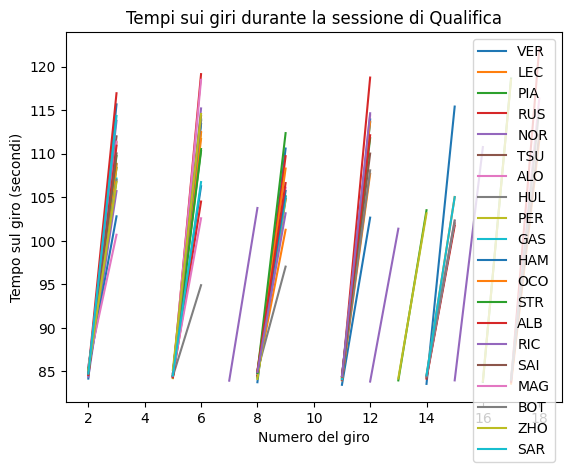

In [5]:


#Plot dei tempi sul giro di tutti i piloti
laps['LapTime'] = laps['LapTime'].dt.total_seconds()  # Converti il tempo in secondi
drivers = laps['Driver'].unique()

for driver in drivers:
    driver_laps = laps[laps['Driver'] == driver]
    plt.plot(driver_laps['LapNumber'], driver_laps['LapTime'], label=driver)

plt.xlabel('Numero del giro')
plt.ylabel('Tempo sul giro (secondi)')
plt.title('Tempi sui giri durante la sessione di Qualifica')
plt.legend()
plt.show()
